In [1]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def show(images) :
    if type(images) is np.ndarray:
        images = [images]
    l = len(images)
    fig = plt.figure()
    fig.set_size_inches(20,20)
    for i,image in enumerate(images):
        b,g,r = cv2.split(image)
        fig.add_subplot(1, l, i+1)
        plt.imshow(cv2.merge((r,g,b)))
    plt.show()


In [3]:
im = cv2.imread('input/red_barrels.png')


In [4]:
def split_up(min,max,ticks):
    return [int(min + (max-min) * i / float(ticks)) for i in range(ticks+1)]

In [5]:
def draw_vanishing_lines(im):
    im_h, im_w, _ = im.shape
    vanishing_point_xy = (718,270)
    radius = 10
    thickness = 3

    color = (255,50,50,100)

    im = cv2.circle(im,vanishing_point_xy,radius,color)

    for x in split_up(0-5000,im_w+5000,ticks=30):
      cv2.line(im, (x,im_h), vanishing_point_xy, color)


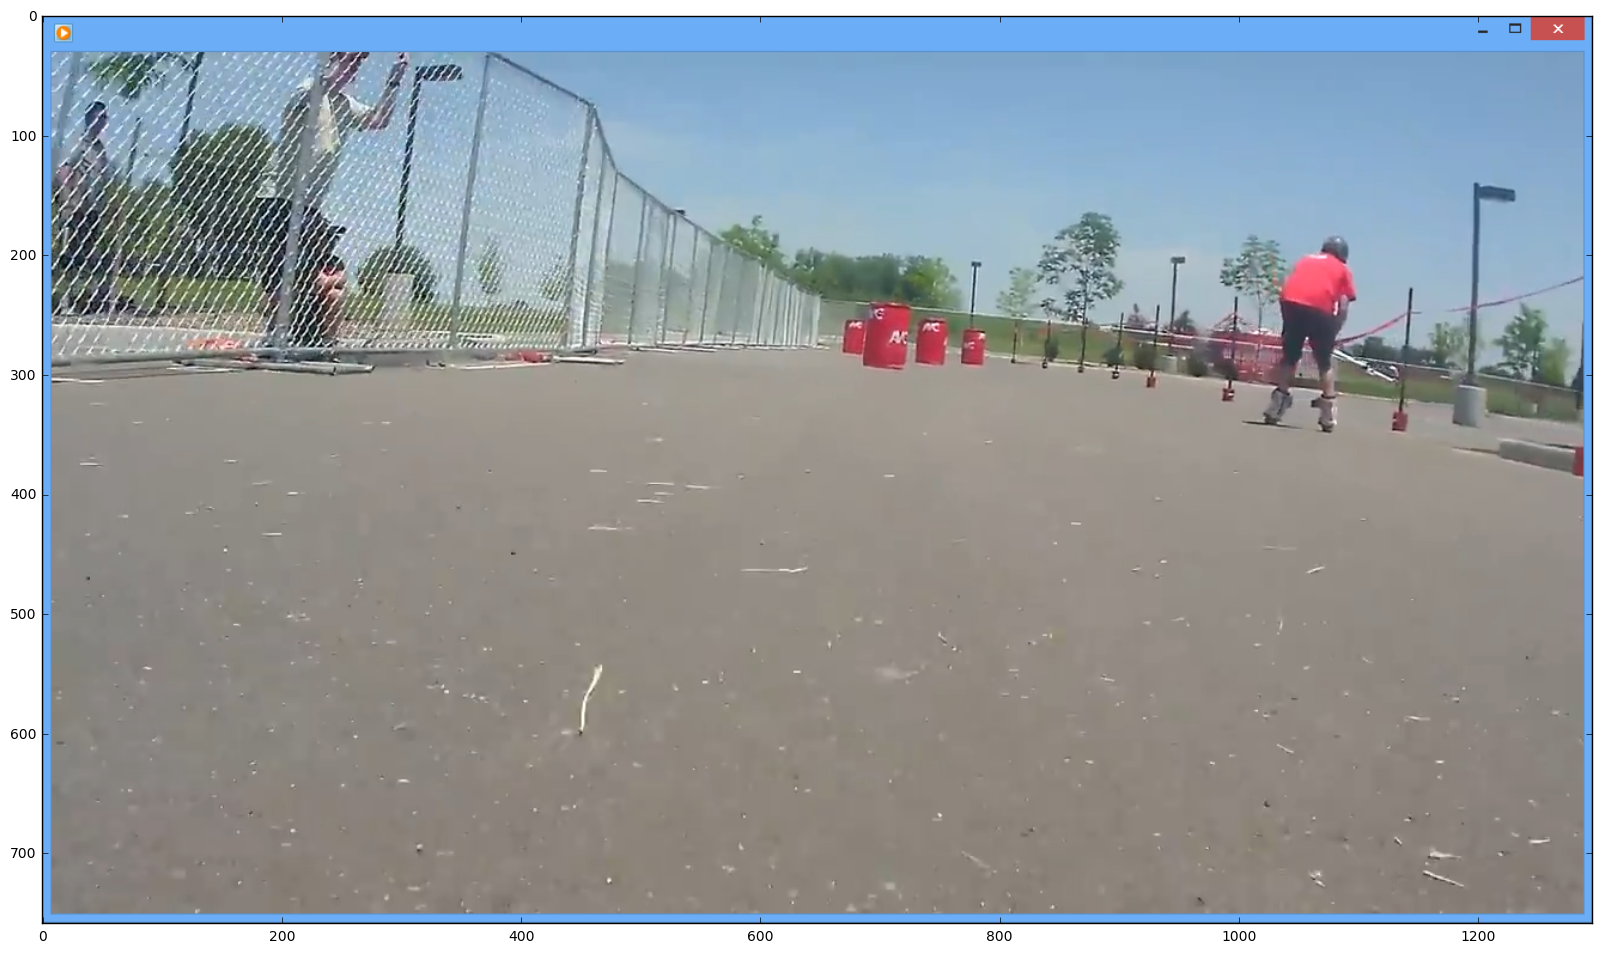

In [6]:
show(im)

In [7]:
# based on https://stackoverflow.com/a/30333177/383967
def find_red(img):
    img_hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # lower mask (0-10)
    lower_red = np.array([0,50,50])
    upper_red = np.array([10,255,255])
    mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

    # upper mask (170-180)
    lower_red = np.array([170,50,50])
    upper_red = np.array([180,255,255])
    mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

    # join masks
    mask = mask0+mask1

    # set my output img to zero everywhere except my mask
    output_img = img.copy()
    output_img[np.where(mask==0)] = 0
    return output_img


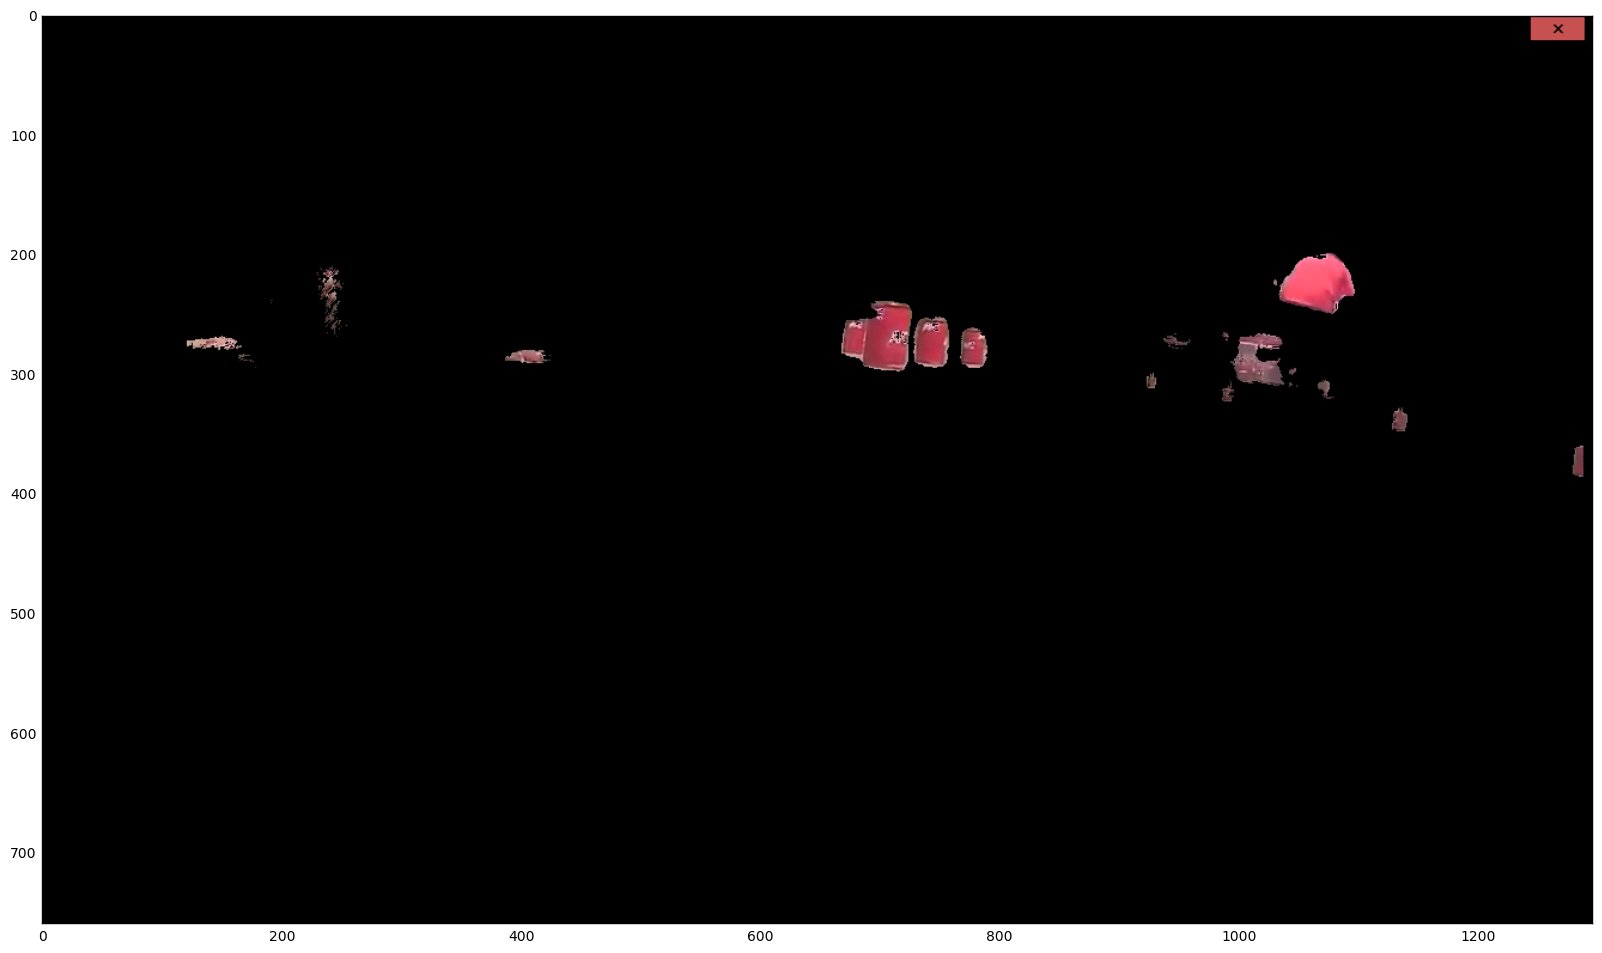

In [8]:
im_red = find_red(im)
show([im_red])


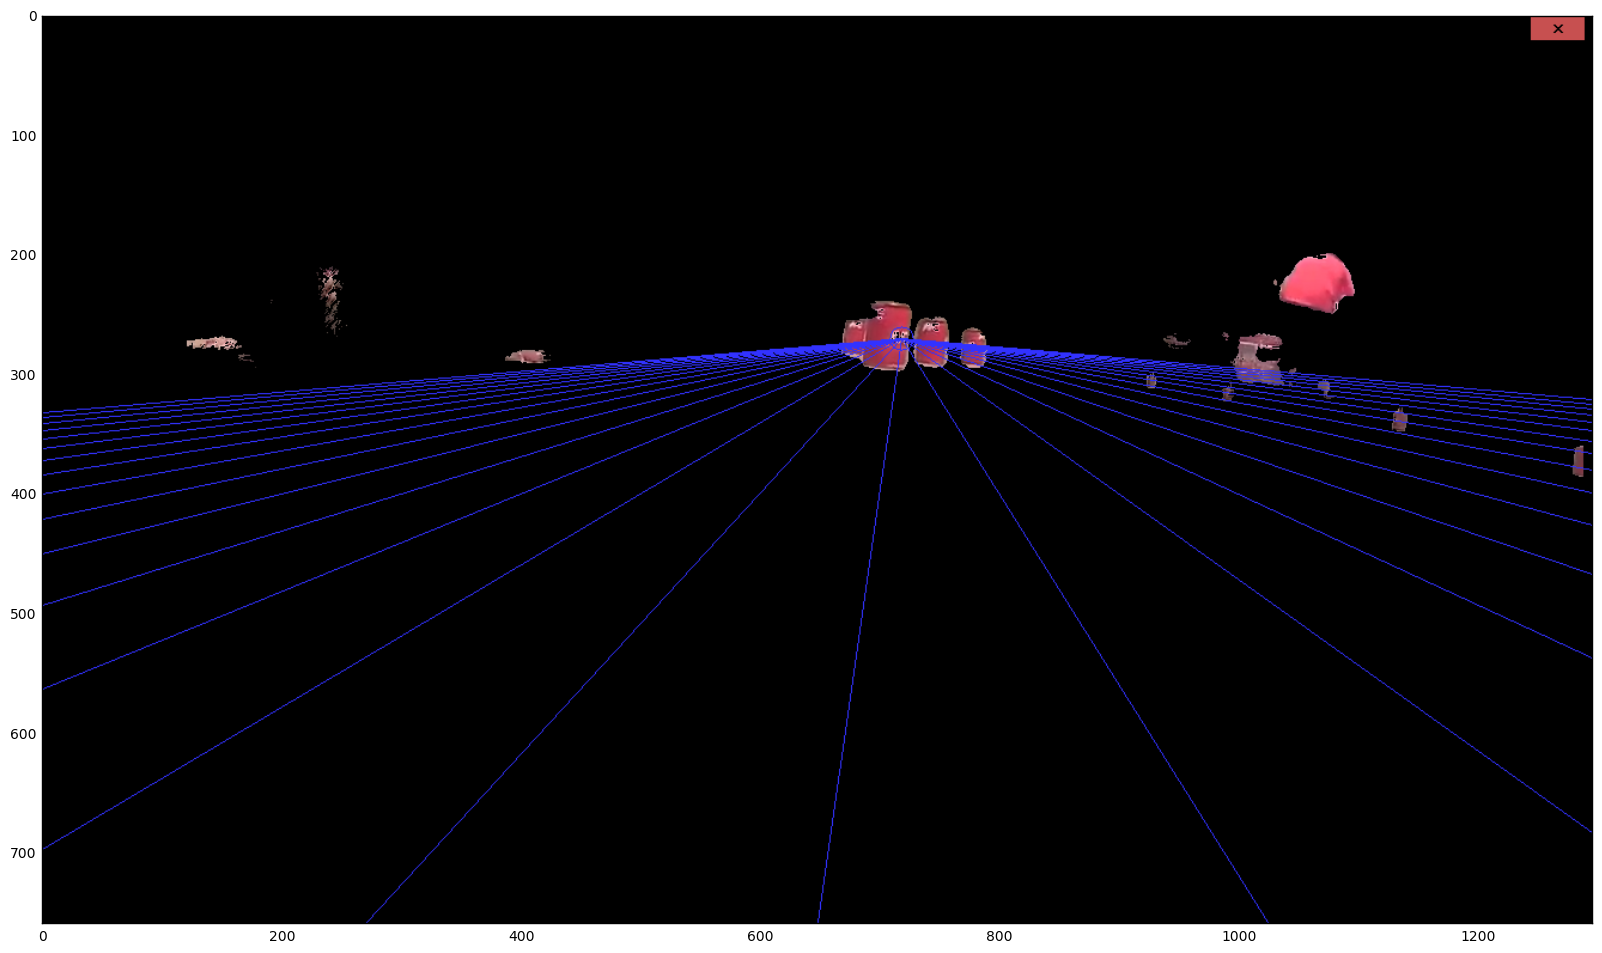

In [9]:
draw_vanishing_lines(im_red)
show([im_red])